<a href="https://colab.research.google.com/github/friederrr/proof_contamination/blob/main/code/LLM_eval/LLM_Eval_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**prod**

## LLM Evaluation Visuals (Performance Gaps)

Start0: First check the answers of the LLM manually -> create an excel file.

Start1: Excel Data with LLM Performance Data on Dataset -> Visualize the performance Gap

In [ ]:
%%capture
# install and import libs:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig
import torch
import json
from pathlib import Path
from datetime import datetime
import pytz
import itertools
import uuid  # Generate a unique experiment ID
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


!pip install datasets
from datasets import Dataset, concatenate_datasets

In [ ]:
#connect to your account (somehow only once needed) [uncomment if needed]

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#from huggingface_hub import notebook_login
#notebook_login()

Mounted at /content/drive


## Manually LLM Correctness Check

In [ ]:
import re

def extract_boxed_items(text):
    pattern = r'\\boxed\s*{([^{}]*(?:{[^{}]*}[^{}]*)*)}'
    return re.findall(pattern, text)


**OLMO**:

- "allenai/OLMo-7B-0724-hf": Downlaod (F32): (27 GB), GPU-RAM (bfloat16): 14 GB (T4 sufficient)

- "allenai/OLMo-7B-0724-SFT-hf": Download (BF16) (14 GB), GPU-RAM (14 GB)

- "allenai/OLMo-7B-0724-Instruct-hf": Download (BF16) (14 GB), GPU-RAM (14 GB)

- "allenai/OLMo-2-1124-13B-Instruct": Download (BF16) (28 GB), GPU-RAM (27 GB) -> works fine with A100!

**DEEPSEEK**:
- "deepseek-ai/deepseek-math-7b-instruct":

**LEMMA**:
- "EleutherAI/llemma_7b"

**GPT4o**:
- "gpt-4o-2024-11-20"



In [ ]:
model_id = "gpt-4o-2024-11-20"

DRIVE_PATH = Path('drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1') / model_id

In [ ]:
# List all JSON files recursively (in subfolders too, if needed)
json_files = list(DRIVE_PATH.rglob(f"*.json"))

# Print the list of file paths
for file in json_files:
    print(file)

drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/gpt-4o-2024-11-20/output_MathCONTA_word_1-24_GPT4o_2025-04-18.json
drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/gpt-4o-2024-11-20/output_MathCONTA_amc8_1-36_GPT4o_2025-04-18.json
drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/gpt-4o-2024-11-20/output_MathCONTA_aime_1-20_GPT4o_2025-04-18.json
drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/gpt-4o-2024-11-20/output_MathCONTA_forum_1-20_GPT4o_2025-04-18.json


In [ ]:
for file_path in json_files:
        with open(file_path, 'r') as f:
            data = json.load(f)

In [ ]:
data['metadata']['description']

'Evaluation of model GPT4o on MathCONTA_forum'

In [ ]:
i=-1
output = data['data']

In [ ]:
i+=1
#i=15
row = output[i]
print("-------ID--------")
print(row['ID'])
print("-------Problem--------")
print(row['PROBLEM'])

print("-------LLM Response--------")
print(row['LLM_RESPONSE'])

print("\n\n-------LLM BOXES--------")
print(extract_boxed_items(row['LLM_RESPONSE']))

print("-------Ground Truth Answer KEY--------")
print(row['SOLUTION_KEY'])

print("\n\n-------Ground Truth Answer TEXT--------")
print(row["SOLUTION_TEXT"])


-------ID--------
clean-forum-10
-------Problem--------
$x, y, z \\in \\mathbb{R}$ satisfy the following system of equations\n$$\\left\\{ \\begin{array}{l} x^2 + y^2 + xy - 7x = 0 \\\\ z(x + y + z - 9) - 8y = -25 \\end{array} \\right.$$ \nFind $x + y + z$.\n\n
-------LLM Response--------
We are tasked with solving the system of equations:

\[
\begin{aligned}
1. & \quad x^2 + y^2 + xy - 7x = 0, \\
2. & \quad z(x + y + z - 9) - 8y = -25,
\end{aligned}
\]

and finding \(x + y + z\). Let us solve this step by step.

---

### Step 1: Analyze the first equation
The first equation is:
\[
x^2 + y^2 + xy - 7x = 0.
\]
We can rewrite this as:
\[
x^2 + xy + y^2 - 7x = 0.
\]
Factorize the left-hand side. Group terms involving \(x\):
\[
x(x + y - 7) + y^2 = 0.
\]
Thus, the equation becomes:
\[
x(x + y - 7) = -y^2.
\]

---

### Step 2: Analyze the second equation
The second equation is:
\[
z(x + y + z - 9) - 8y = -25.
\]
Simplify the left-hand side:
\[
zx + zy + z^2 - 9z - 8y = -25.
\]
Rearrange term

## Excel Evaluation

In [ ]:
DRIVE_PATH = Path('drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1') / 'correctness_checks'

# List all JSON files recursively (in subfolders too, if needed)
xlsx_files = list(DRIVE_PATH.rglob(f"*.xlsx"))

# Print the list of file paths
for file in xlsx_files:
    print(file)

drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/correctness_checks/word.xlsx
drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/correctness_checks/amc8.xlsx
drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/correctness_checks/aime.xlsx
drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1/correctness_checks/forum.xlsx


## Visualisierungen

### Create Dataframe

In [ ]:
def combine_excel_files(file_paths):
    combined_df = pd.DataFrame()

    for file_path in file_paths:
        # Read all sheets from the current Excel file into a dictionary
        sheets_dict = pd.read_excel(file_path, sheet_name=None)

        for sheet_name, df in sheets_dict.items():
            df['MODEL_SHORT'] = sheet_name
            combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Remove rows where 'ID' is NaN
    combined_df = combined_df.dropna(subset=['ID']).reset_index(drop=True)

    # Select and cast specific columns
    columns_to_keep = ['ID', 'CATEGORY', 'DIFFICULTY_SCORE_A', 'LABEL', 'CORRECTNESS', 'MODEL_SHORT']
    combined_df = combined_df[columns_to_keep]

    combined_df['ID'] = combined_df['ID'].astype(str)
    combined_df['CATEGORY'] = combined_df['CATEGORY'].astype(str)
    combined_df['DIFFICULTY_SCORE_A'] = combined_df['DIFFICULTY_SCORE_A'].astype(int)
    combined_df['LABEL'] = combined_df['LABEL'].astype(str)
    combined_df['CORRECTNESS'] = combined_df['CORRECTNESS'].astype(int)
    combined_df['MODEL_SHORT'] = combined_df['MODEL_SHORT'].astype(str)
    return combined_df

In [ ]:
df_all=combine_excel_files(xlsx_files)
df_standard = df_all[df_all['MODEL_SHORT'] != 'GPT4o']
df_standard

,ID,CATEGORY,DIFFICULTY_SCORE_A,LABEL,CORRECTNESS,MODEL_SHORT
0,owm-word-1,word-problems,1,Conta,1,DS
1,clean-word-1,word-problems,1,Clean,0,DS
2,owm-word-2,word-problems,1,Conta,1,DS
3,clean-word-2,word-problems,1,Clean,1,DS
4,owm-word-3,word-problems,1,Conta,1,DS
...,...,...,...,...,...,...
475,clean-forum-6,Forum,3,Clean,0,OL2
476,clean-forum-7,Forum,3,Clean,0,OL2
477,clean-forum-8,Forum,3,Clean,0,OL2
478,clean-forum-9,Forum,3,Clean,0,OL2


In [ ]:
df_standard.groupby('CATEGORY').agg(
    mean=('CORRECTNESS', 'mean'))

,mean
CATEGORY,
AIME,0.000000
AMC8,0.284722
Forum,0.012500
word-problems,0.572917


### Combined Accuracy on MathCONTA

In [ ]:
DRIVE_PATH_visuals = Path('drive/MyDrive/Masterarbeit25/eval_data/MathCONTA_v1') / 'visuals'

In [ ]:
def accross_llm_plot(df):
    # Aggregate
    grouped = df.groupby('LABEL').agg(
        mean=('CORRECTNESS', 'mean'),
        ci=('CORRECTNESS', lambda x: 1.96 * (np.std(x, ddof=1) / np.sqrt(len(x))))
    ).reset_index()

    # Order
    order = ['Conta', 'Clean']
    grouped['LABEL'] = pd.Categorical(grouped['LABEL'], categories=order, ordered=True)
    grouped = grouped.sort_values('LABEL')

    # Define colors manually
    color_map = {'Clean': 'royalblue', 'Conta': 'darkorange'}
    colors = grouped['LABEL'].map(color_map)

    # Create grouped x-axis positions
    x = np.arange(len(grouped))  # [0, 1] for two bars

    fig, ax = plt.subplots(figsize=(3, 4))
    bars = ax.bar(x, grouped['mean'],
                  yerr=grouped['ci'], capsize=5, width=0.7,
                  color=colors, edgecolor='black', error_kw=dict(lw=1.5))

    # Add values on bars
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)

    # --- ADD performance gap between the two bars ---
    if len(grouped) == 2:
        gap =  grouped['mean'].iloc[0] - grouped['mean'].iloc[1]
        mid_x = (x[0] + x[1]) / 2
        max_y = max(grouped['mean']) + 0.4  # Position above both bars
        ax.text(mid_x, max_y,
                f'Δ {gap:.2f}', ha='center', va='bottom', fontsize=14)

    # Fix x-ticks to labels
    ax.set_xticks(x)
    ax.set_xticklabels(grouped['LABEL'])

    # Style
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Label')
    ax.set_ylim(0, 1)
    ax.set_title('Combined Accuracy')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig('llm_eval_combined_acc.svg')
    plt.show()
    return grouped




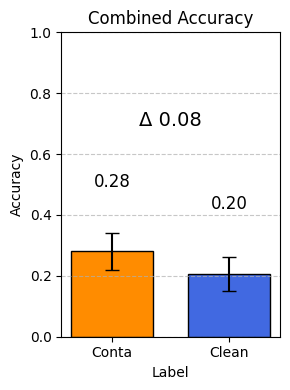

In [ ]:
df=accross_llm_plot(df_standard)

In [ ]:
df

,LABEL,mean,ci
1,Conta,0.280,0.062384
0,Clean,0.205,0.056091


### Combined Accuracy by Category/Difficulty

In [ ]:
def difficulty_grouped_plot(df, difficulty_column):
    # Aggregate
    grouped = df.groupby([difficulty_column, 'LABEL']).agg(
        mean=('CORRECTNESS', 'mean'),
        ci=('CORRECTNESS', lambda x: 1.96 * (np.std(x, ddof=1) / np.sqrt(len(x))))
    ).reset_index()

    # Force LABEL order: Conta first, then Clean
    label_order = ['Conta', 'Clean']
    grouped['LABEL'] = pd.Categorical(grouped['LABEL'], categories=label_order, ordered=True)

    # Pivot for easier plotting
    pivot = grouped.pivot(index=difficulty_column, columns='LABEL', values='mean')
    pivot_ci = grouped.pivot(index=difficulty_column, columns='LABEL', values='ci')

    # --- SORT by 'Conta' mean descending ---
    pivot = pivot.sort_values(by='Conta', ascending=False)
    pivot_ci = pivot_ci.loc[pivot.index]  # re-align CI table

    # Settings
    labels = pivot.index
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))

    # Colors: Conta (orange) first, Clean (blue) second
    color_map = {'Conta': 'darkorange', 'Clean': 'royalblue'}

    # Plot bars
    rects1 = ax.bar(x - width/2, pivot['Conta'], width, label='Conta',
                    yerr=pivot_ci['Conta'], capsize=5, color=color_map['Conta'], edgecolor='black')
    rects2 = ax.bar(x + width/2, pivot['Clean'], width, label='Clean',
                    yerr=pivot_ci['Clean'], capsize=5, color=color_map['Clean'], edgecolor='black')

    # Labels and titles
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Category')
    ax.set_title('Combined Accuracy by Category')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add performance gap text
    for i, label in enumerate(labels):
        conta = pivot.loc[label, 'Conta']
        clean = pivot.loc[label, 'Clean']
        gap = conta - clean
        gap_text = f"Δ {gap:.2f}"
        # Place the text above the taller of the two bars
        y_pos = max(conta, clean) + 0.2
        ax.text(x[i], y_pos, gap_text, ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    #plt.savefig('llm_eval_combined_acc_by_category.svg')
    plt.show()
    return pivot



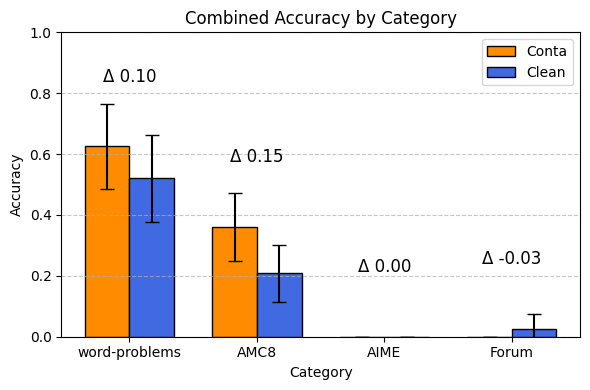

LABEL,Conta,Clean
CATEGORY,,
word-problems,0.625000,0.520833
AMC8,0.361111,0.208333
AIME,0.000000,0.000000
Forum,0.000000,0.025000


In [ ]:
difficulty_grouped_plot(df_standard, "CATEGORY") #DIFFICULTY_SCORE_A

### Accuracy per LLM on MathCONTA

In [ ]:
def grouped_plot_by_model_simple(df):
    # Aggregate
    grouped = df.groupby(['MODEL_SHORT', 'LABEL']).agg(
        mean=('CORRECTNESS', 'mean'),
        ci=('CORRECTNESS', lambda x: 1.96 * (np.std(x, ddof=1) / np.sqrt(len(x))))
    ).reset_index()

    # Force LABEL order: Conta first, then Clean
    label_order = ['Conta', 'Clean']
    grouped['LABEL'] = pd.Categorical(grouped['LABEL'], categories=label_order, ordered=True)

    # Pivot for easier plotting
    pivot = grouped.pivot(index='MODEL_SHORT', columns='LABEL', values='mean')
    pivot_ci = grouped.pivot(index='MODEL_SHORT', columns='LABEL', values='ci')

    # Settings
    labels = pivot.index
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # width of the bars

    fig, ax = plt.subplots(figsize=(9, 4))

    # Colors: Conta (orange) first, then Clean (blue)
    color_map = {'Conta': 'darkorange', 'Clean': 'royalblue'}

    # Plot bars
    rects1 = ax.bar(x - width/2, pivot['Conta'], width, label='Conta',
                    yerr=pivot_ci['Conta'], capsize=5, color=color_map['Conta'], edgecolor='black')
    rects2 = ax.bar(x + width/2, pivot['Clean'], width, label='Clean',
                    yerr=pivot_ci['Clean'], capsize=5, color=color_map['Clean'], edgecolor='black')

    # Labels and titles
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('MODEL_SHORT')
    ax.set_title('Accuracy by MODEL_SHORT and Label')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

def grouped_plot_by_model(df):
    #use this with GPT4o

    # Aggregate
    grouped = df.groupby(['MODEL_SHORT', 'LABEL']).agg(
        mean=('CORRECTNESS', 'mean'),
        ci=('CORRECTNESS', lambda x: 1.96 * (np.std(x, ddof=1) / np.sqrt(len(x))))
    ).reset_index()

    # Force LABEL order: Conta first, then Clean
    label_order = ['Conta', 'Clean']
    grouped['LABEL'] = pd.Categorical(grouped['LABEL'], categories=label_order, ordered=True)

    # Pivot for easier plotting
    pivot = grouped.pivot(index='MODEL_SHORT', columns='LABEL', values='mean')
    pivot_ci = grouped.pivot(index='MODEL_SHORT', columns='LABEL', values='ci')

    # Reorder: GPT4o first
    models = pivot.index.tolist()
    models = [m for m in models if m != 'GPT4o']
    models = ['GPT4o'] + models
    pivot = pivot.loc[models]
    pivot_ci = pivot_ci.loc[models]

    # Settings
    labels = pivot.index
    n = len(labels)
    x = np.arange(n)

    width = 0.35  # width of the bars

    # Insert a bigger gap manually
    gap_size = 0.3
    x = np.array([i if i == 0 else i + gap_size for i in range(n)])

    fig, ax = plt.subplots(figsize=(7, 4))

    # Colors
    color_map = {'Conta': 'darkorange', 'Clean': 'royalblue'}

    # Plot bars
    for idx, model in enumerate(labels):
        alpha = 0.5 if model == 'GPT4o' else 1.0
        x_pos = x[idx]

        conta_mean = pivot.loc[model, 'Conta']
        clean_mean = pivot.loc[model, 'Clean']

        # Bars
        ax.bar(x_pos - width/2, conta_mean, width,
               yerr=pivot_ci.loc[model, 'Conta'], capsize=5,
               color=color_map['Conta'], edgecolor='black', alpha=alpha)

        ax.bar(x_pos + width/2, clean_mean, width,
               yerr=pivot_ci.loc[model, 'Clean'], capsize=5,
               color=color_map['Clean'], edgecolor='black', alpha=alpha)

        # Add performance gap label
        perf_gap = abs(conta_mean - clean_mean)
        higher = max(conta_mean, clean_mean)

        ax.text(x_pos, higher + 0.2, f"Δ {perf_gap:.2f}",
                ha='center', va='bottom', fontsize=12)

    # Separation line (placed exactly after GPT4o)
    separation_pos = (x[0] + x[1]) / 2  # middle between GPT4o and next model
    ax.axvline(x=separation_pos, color='gray', linestyle='--', alpha=0.7)

    # Labels and titles
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('LLMs')
    ax.set_title('Accuracy per LLM on MathCONTA')

    # Rename GPT4o -> GPT4o* for display
    display_labels = ['GPT4o*' if label == 'GPT4o' else label for label in labels]
    ax.set_xticks(x)
    ax.set_xticklabels(display_labels, rotation=45, ha='right')
    ax.set_ylim(0, 1.05)  # Slightly higher to leave room for text

    # Create custom legend (using solid colors, no transparency)
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=color_map['Conta'], edgecolor='black', label='Conta'),
        Patch(facecolor=color_map['Clean'], edgecolor='black', label='Clean')
    ]
    ax.legend(handles=legend_elements)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    #plt.savefig(DRIVE_PATH_visuals/'llm_eval_per_llm_acc.pdf')
    plt.show()
    return pivot


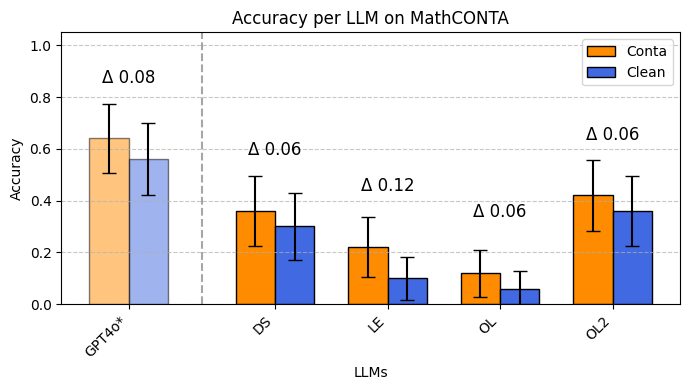

LABEL,Conta,Clean
MODEL_SHORT,,
GPT4o,0.64,0.56
DS,0.36,0.30
LE,0.22,0.10
OL,0.12,0.06
OL2,0.42,0.36


In [ ]:
grouped_plot_by_model(df_all)

### Performance Metrics Table

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

def analyze_performance(df):
    results = []

    models = df['MODEL_SHORT'].unique()

    for model in models:
        model_df = df[df['MODEL_SHORT'] == model]

        contaminated = model_df[model_df['LABEL'] == 'Conta']
        clean = model_df[model_df['LABEL'] == 'Clean']

        # Compute accuracy
        contaminated_acc = contaminated['CORRECTNESS'].mean()
        clean_acc = clean['CORRECTNESS'].mean()

        # Compute absolute gap: (contaminated - clean)
        absolute_gap = contaminated_acc - clean_acc

        # Perform Mann–Whitney U test
        if len(contaminated) > 0 and len(clean) > 0:
            stat, p_value = mannwhitneyu(
                contaminated['CORRECTNESS'],
                clean['CORRECTNESS'],
                alternative='two-sided'
            )
        else:
            stat, p_value = None, None

        results.append({
            'Model': model,
            'Accuracy Conta': contaminated_acc,
            'Accuracy Clean': clean_acc,
            'Performance Gap': absolute_gap,
            'p_value': p_value
        })

    results_df = pd.DataFrame(results)
    return results_df



In [ ]:
perf_df=analyze_performance(df_all)
perf_df

,Model,Accuracy Conta,Accuracy Clean,Performance Gap,p_value
0,DS,0.36,0.30,0.06,0.528316
1,LE,0.22,0.10,0.12,0.104589
2,OL,0.12,0.06,0.06,0.300166
3,OL2,0.42,0.36,0.06,0.543250
4,GPT4o,0.64,0.56,0.08,0.418894


In [ ]:
perf_df.to_csv('performance_metrics.csv', index=False)